# CS 598 Deep Learning for HealthCare - Project Draft
## Team 41
### Indranil Guha| Iguha4@illinois.edu,
### Snehangshu Bhattacharjee | sb8@illinois.edu





# 1. Introduction

The paper can be found in this link: https://arxiv.org/abs/2108.03625


**Citation**

      @misc{
      hur2021unifying,
      title={Unifying Heterogenous Electronic Health Records Systems via Text-Based Code Embedding},
      author={Kyunghoon Hur and Jiyoung Lee and Jungwoo Oh and Wesley Price and Young-Hak Kim and Edward Choi},
      year={2021},
      eprint={2108.03625},
      archivePrefix={arXiv},
      primaryClass={cs.LG}
      }

## Background of the problem
Increased adoption of electronic health record (EHR) systems offers great potential for HER-based predictive models to improve healthcare quality. But EHR data is heterogenous in nature and contemporary EHR data rely on data systems ranging from standardized codes e.g ICD9, LOINC etc. to free text entry. The commonly used “code based embedding” or CodeEmb approach used in different hospitals thus are not transferrable, and as a result predictive models couldn’t be trained on large EHR data collected from various hospitals or medical institutions due to its heterogenous format, so these predictive models can be used at scale in order to get its full effectiveness. This challenge can be addressed using common data model such as OMOP, FHIR (Rajko- mar et al., 2018), however this requires significant human effort and domain knowledge and different code systems used across the hospitals also may not always be mapped to a common model.

## Paper explanation
In this paper, author suggested a code-agnostic text based representation learning called Description-Based Embedding or DescEmb. DescEmb adopts a Neural Text Encoder to convert the medical codes to a contextualized embedding which allows codes from different systems maps to the same text embedding space. As compare to code-based embedding, In this specific approach, instead of directly embedding the medical codes, a series of vector representation of code descriptions passed through the neural text encoder and this DescEmb makes it possible to train models on differently formatted EHR data interchangeably due to its code-agnostic nature.

The Text Encoder in DescEmb model can be any model that can generate a hidden state representation from a given description. The paper used two model architecture as a text encoder : Bi-Directional RNN and BERT. It also mentioned about pretraining the text-encoder using Masked Language Modeling (MLM). In the context of drug prescriptions, dosage or rate of Infusion can be useful to know the patient status. Value embedding is another innovative approach which is introduced here to capture the values along with the description added another effective feature for effective predictive outcome. Four different value embedding methods has been used such as – Value Aggregation (VA), Digit split value aggregation (DSVA), Digit Place embedding (DPE), and Value concatenated embedding (VC).

The code agnostic approach described in the paper proposes improvement in performance with Zero Shot and few shot transfer learning and pooled learning and thus it unifies heterogeneous code systems in healthcare predictive research.

Contributions of this specific approach to the predictive healthcare research:

1)	DescEmb achieves comparable or superior performance to CodeEmb on common clinical predictive tasks.

2)	Two differently structured EHR can be used to train and test predictive models interchangeably showing better performance than training on a single EHR data.

3)	No additional domain knowledge or manual effort needed to pool two differently structured EHR dataset into the embedding space.

4)	It opens the door for text based approach in predictive healthcare research.


#2. Scope of Reproducibility


In this project we will be experimenting on the below two hypothesis as a scope of reproducibility.

## Hypothesis 1

To test if a Pretrained DescEmb models with MLM achieve comparable or superior performance to a Pretrained CodeEmb model using Word2Vec for a test predictive task with one or many value embedding methods.

##Hypothesis 2
To Test if we observe predominantly higher performance of DescEmb over CodeEmb in single domain learning setting.

##Ablations
We can see how value embedding is impacting the performance of a predictive task using a DescEmb model by training w/ and w/o value embedding method. Will be using diagnosis predictive task for this experiment.


# 3. Methodology

## About the Source Code



Existing code in the GitHub repo referenced in the paper will be used to run experiments on proposed hypothesis. https://github.com/hoon9405/DescEmb

Steps to follow for another user to access this colab notebook for this project:
1.	Obtain access for the project from the owner (ssb8@illinois.edu or iguha4@illinois.edu)
2.	Once the project folder is shared with the user, user need to add the shared folder to his/her google drive.
3.	Add files from the local repo to the google drive

In [ ]:
# Mount your google drive to the colab runtime using following command.
from google.colab import drive
drive.mount('/content/drive')

### Source of the data:

Datasets will be downloaded from MIMIC III and eICU, filenames and data statistics are given in the below tables.

**MIMIC III**

Johnson, A., Pollard, T., & Mark, R. (2016). MIMIC-III Clinical Database (version 1.4). PhysioNet. https://doi.org/10.13026/C2XW26.

**eICU**

Pollard, T., Johnson, A., Raffa, J., Celi, L. A., Badawi, O., & Mark, R. (2019). eICU Collaborative Research Database (version 2.0). PhysioNet. https://doi.org/10.13026/C2WM1R



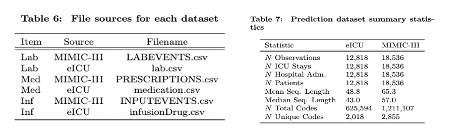

##Preprocessing of data - Initial setup

In [ ]:
# First change the directory to preprocess folder
%cd /content/drive/MyDrive/Project/DescEmb/preprocess/

/content/drive/MyDrive/Project/DescEmb/preprocess


In [ ]:
# Check and Install dependencies
!pip install iterative-stratification

In [ ]:
# Install necessary utility files
!python preprocess_utils.py

**Note: Preprocessing of data will be run outside of this colab notebook to save time for final project submission. **

## Pre-processing with MIMIC-III data

In [ ]:
!python preprocess_main.py --src_data mimiciii --dataset_path /content/drive/MyDrive/Project/DescEmb/data_input_path/mimic --dest_path /content/drive/MyDrive/Project/DescEmb/data_outout_path/mimic

## Pre-processing with eICU data

In [ ]:
!python preprocess_main.py --src_data eicu --dataset_path /content/drive/MyDrive/Project/DescEmb/data_input_path/eicu --dest_path /content/drive/MyDrive/Project/DescEmb/data_outout_path/eicu

## Hypothesis#1

### We will pretrain a codeemb model and descemb model using following script to evaluate which embedding model perform better.

### Model

Author of this paper used two model architecture for text encoder - Bi-RNN and BERT. Here we will pretrain the text encoder using bi-rnn architecture on mimiciii dataset using MLM for the DescEmb model. Value encoding is set to 'NV' as it doesnot applicable for pretraining. For CodeEmb text encoder, standrad word2vec is used.

Other model parameters are set to default, refer to main.py in the DescEmb

In [ ]:
%cd /content/drive/MyDrive/Project/DescEmb/

/content/drive/MyDrive/Project/DescEmb


**Pre-train a DescEmb model with Masked Language Modeling (MLM)**

In [ ]:
!python main.py --distributed_world_size 1 --input_path preprocess dest_path --model descemb_rnn --src_data mimiciii --ratio 100 --n_epochs 100 --value_mode NV --task mlm
# input_path must be preproces destination path

**Pre-train a CodeEmb model with Word2Vec**

In [ ]:
!python main.py --distributed_world_size 1 --input_path preprocess dest_path --model codeemb --src_data mimiciii --ratio 100 -- n_epochs 100 --value_mode NV --task w2v
# input_path must be preproces destination path

### Training





Cross entropy loss is calculated for pretraining the models for both MLM and w2V task setting.

**code snippet**



    self.criterion = (
                nn.BCEWithLogitsLoss() if (
                    self.task not in ["mlm", "w2v"]
                ) else nn.CrossEntropyLoss()
            )
            self.optimizer = torch.optim.Adam(self.model.parameters(), lr=self.lr)

### Evaluation and Results

Average loss will be compared to see the pretraining performance of CodeEmb vs DescEmb to validate the hypothesis.

***Code snippet***

      with rename_logger(logger, "train"):
                      logger.info(
                          "epoch: {}, loss: {:.3f}, auroc: {:.3f}, auprc: {:.3f}".format(
                              epoch, avg_train_loss, auroc_train, auprc_train
                          )
                      )


## Hypothesis#2 and Ablation

### We will use the above pretrained embedding model to test performance on a predictive task for the ehrmodel using codeemb and descemb as the embedding model respectively in a single domain learning setting.

### Model

We will explore single domain learning here. Here we will use the pretarined embedding model as "codeemb" or "descemb_rnn", and RNN is used at the prediction layer.For testing the ablation as mentioned above, we will be using descemb embedding model w/ and w/o value embedding and compare the performance on a predictive task to observe the impact.

Other model parameters are set to default, refer to main.py in the DescEmb

In [ ]:
%cd /content/drive/MyDrive/Project/DescEmb/

/content/drive/MyDrive/Project/DescEmb


**Train the model with DescEmb_rnn as embedding model**

In [ ]:
!python main.py --distributed_world_size 1 --input_path preprocess_dest_path --model ehr_model --embed_model descemb_rnn --pred_model rnn --src_data mimiciii --ratio 100 --value_mode NV --task mortality
# input_path must be preproces destination path

**Train the model with CodeEmb as embedding model**

In [ ]:
!python main.py --distributed_world_size 1 --input_path preprocess_dest_path --model ehr_model --embed_model codeemb --pred_model rnn --src_data mimiciii --ratio 100 --value_mode NV --task mortality
# input_path must be preproces destination path

**Train the model with value embedding for Ablation**

In [ ]:
!python main.py --distributed_world_size 1 --input_path preprocess_dest_path --model ehr_model --embed_model descemb_rnn --pred_model rnn --src_data mimiciii --ratio 100 --value_mode VA --task mortality
# input_path must be preproces destination path
# here VA (Value Aggregation) is selected as value embedding

### Training





Binary Cross Entropy With Logits Lossis used for training the models for single domain learning setting for mortality prediction.

***Code snippet***


    def train(self):
            for epoch in range(1, self.n_epochs + 1):
                logger.info(f"begin training epoch {epoch}")
                preds_train = []
                truths_train = []
                total_train_loss = 0
                auroc_train = 0
                auprc_train = 0

                self.model.train()

                for sample in tqdm.tqdm(self.data_loaders['train']):    
                    self.optimizer.zero_grad(set_to_none=True)
                    net_output = self.model(**sample["net_input"])
                    #NOTE we assume self.model is wrapped by torch.nn.parallel.data_parallel.DataParallel
                    logits = self.model.module.get_logits(net_output)
                    target = self.model.module.get_targets(sample).to(logits.device)

                    if self.task == 'diagnosis':
                        loss = self.criterion(logits, target.squeeze(2))
                    else:
                        loss = self.criterion(logits, target)

                    loss.backward()
                    self.optimizer.step()

                    total_train_loss += loss.item()

                    with torch.no_grad():
                        if self.task not in ['mlm', 'w2v']:
                            truths_train += list(target.cpu().numpy().flatten())
                            probs_train = torch.sigmoid(logits).cpu().numpy()
                            preds_train += list(probs_train.flatten())

                avg_train_loss = total_train_loss / len(self.data_loaders['train'])
                if self.task not in ['mlm', 'w2v']:
                    auroc_train = roc_auc_score(truths_train, preds_train)
                    auprc_train = average_precision_score(truths_train, preds_train, average='micro')

                with rename_logger(logger, "train"):
                    logger.info(
                        "epoch: {}, loss: {:.3f}, auroc: {:.3f}, auprc: {:.3f}".format(
                            epoch, avg_train_loss, auroc_train, auprc_train
                        )
                    )

                should_stop = self.validate_and_save(epoch, self.valid_subsets)
                if should_stop:
                    break


### Evaluation and Results

Loss, auroc and auprc will be compared to see the performance of ehrmodel using CodeEmb and DescEmb as the embedding model to validate for this hypothesis.


***For ablations,***
Loss, auroc and auprc will be compared to see the impact of value embedding for ehrmodel using DescEmb as the embedding model in comparison to the same model without value embeddig.

**Code Snippet**

    with rename_logger(logger, "train"):
                    logger.info(
                        "epoch: {}, loss: {:.3f}, auroc: {:.3f}, auprc: {:.3f}".format(
                            epoch, avg_train_loss, auroc_train, auprc_train
                        )
                    )



# 4. Discussion

##### We are still waiting for the credentials from PhysioNet to download the files and run the model for results and observations. At this point, we are not known what complexity or computation challenge we will face during our test. A successful reproducibility will depend on this.

##### Once we get the access and run the two proposed hypothesis, we can further test how the models functions in transfer learning setting, where we can train the model with mimiciii and run a predictive test on the eICU dataset using the pretrained embedding model trained on mimiciii dataset.
